In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import numpy as np
import glob
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
face_cascade = cv2.CascadeClassifier('/Users/jack_wu/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/jack_wu/opencv/data/haarcascades/haarcascade_eye.xml')

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory


def image_augument(item_Num, age, gender): #item_Num = count
	s_jpg='.jpg'
	input_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/FinalProject_dataset/child/male/"
	#input_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/FinalProject_dataset/"+age+'/'+gender+'/'
	#output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/"+age+'/'+gender+'/'
	output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/"
	count = 0
	for file_count in range(item_Num):
		i = 0
		s_file_count = str(file_count)
		img = cv2.imread(input_address + s_file_count + s_jpg)
		x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
		x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
		for batch in datagen.flow(x, batch_size=1, save_to_dir=output_address, save_format='jpg'):
			i += 1
			count +=1
			if i > 10:
				break  # otherwise the generator would loop indefinitely
	return count

def initial_face(item_Num, age, gender):
	s_jpg='.jpg'
	count = 0
	#All_jpg=glob.glob('/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/'+age+'/'+gender+'/'+'*.jpg')
	All_jpg=glob.glob('/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Image_augument/*.jpg')
	#output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"+age+'/'+gender+'/'
	output_address = "/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"
	#for file_count in range(item_Num):
	for jpg in All_jpg:
		img = cv2.imread(jpg)
		faces = face_cascade.detectMultiScale(img, 1.3, 5)
		if (len(faces)!=0):
			for (x,y,w,h) in faces:
				gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
				cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
				roi_gray = gray[y:y+h, x:x+w]
				resize_face=cv2.resize(roi_gray,(30,30),interpolation=cv2.INTER_AREA)
				cv2.imwrite(output_address+str(count)+s_jpg, resize_face, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
				count = count + 1
		else:
			## No face detect
			pass
	return count

# num=image_augument(1,"child","male")
# initial_face(num,"child","male")


# def img2csv (age, gender):
# 	bmpfile=glob.glob("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"+age+'/'+gender+'/'+'*.jpg')
# 	X_train = []
# 	for bmp_dir in bmpfile:
# 		img = cv2.imread(bmp_dir,0)
# 		flatten_img = np.array(img).flatten() # a = np.array([1,2],[3,4]) , a.T.flatten [1,3,2,4] , a.flatten [1,2,3,4]
# 		#X_train = np.append(X_train, flatten_img, axis = 0)
# 		X_train.append(flatten_img)
# 	X_train = np.array(X_train)
# 	np.savetxt("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"+age+'_'+gender+".csv", X_train, delimiter=',')
# 	return X_train

# def merge_train_data():
# 	try:
# 		os.remove("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/X_train.csv")
# 	except OSError:
# 		pass
# 	csvs=glob.glob('/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/*.csv')
# 	train_data = open("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/X_train.csv","a")
# 	lable_data = open("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Y_train.csv","w")
# 	count = 0
# 	Y_train = 0
# 	for csv_file in csvs:
# 		f = open(csv_file)
# 		for line in f:
# 			Y_train += 1
# 			train_data.write(line)
# 			lable_data.write(str(count))
# 			lable_data.write('\n')
# 		count +=1
# 		f.close()
# 	train_data.close()
# 	lable_data.close()
# 	#return



Using TensorFlow backend.


In [2]:
# num_image = image_augument(1210,'adult','female')
# num_eff_facedetection = initial_face(num_image,'adult','female')
# print ("adult female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(1588,'adult','male')
# num_eff_facedetection = initial_face(num_image,'adult','male')
# print ("adult male num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(774,'child','female')
# num_eff_facedetection = initial_face(num_image,'child','female')
# print ("child female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(650,'child','male')
# num_eff_facedetection = initial_face(num_image,'child','male')
# print ("child male num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(452,'elder','female')
# num_eff_facedetection = initial_face(num_image,'elder','female')
# print ("elder female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(878,'elder','male')
# num_eff_facedetection = initial_face(num_image,'elder','male')
# print ("elder male num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(1002,'young','female')
# num_eff_facedetection = initial_face(num_image,'young','female')
# print ("young female num_eff_facedetection",num_eff_facedetection)

# num_image = image_augument(830,'young','male')
# num_eff_facedetection = initial_face(num_image,'young','male')
# print ("young male num_eff_facedetection",num_eff_facedetection)



In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import cv2
import numpy as np
def img2csv (num_eff_facedetection, age, gender):
	bmpfile=glob.glob("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Face_detection/"+age+'/'+gender+'/'+'*.jpg')
	X_train = np.zeros((num_eff_facedetection,30,30))
	count = 0
	for bmp_dir in bmpfile:
		img = cv2.imread(bmp_dir,0)
		img = np.array(img)
		X_train[count,:,:] = img[:,:]
		count += 1
	return X_train

X_train_0 = img2csv(2685,'adult','female')
X_train_1 = img2csv(2572,'adult','male')
X_train_2 = img2csv(1839,'child','female')
X_train_3 = img2csv(1542,'child','male')
X_train_4 = img2csv(1102,'elder','female')
X_train_5 = img2csv(1427,'elder','male')
X_train_6 = img2csv(2066,'young','female')
X_train_7 = img2csv(1872,'young','male')
X_train = np.concatenate((X_train_0, X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6, X_train_7),axis = 0)
Y_train = np.concatenate((np.zeros(2685),np.ones(2572),2*np.ones(1839),3*np.ones(1542),4*np.ones(1102),5*np.ones(1427),6*np.ones(2066),7*np.ones(1872)),axis = 0)



print (X_train.shape)
print (Y_train.shape)




(15105, 30, 30)
(15105,)


Train on 15105 samples, validate on 15105 samples
Epoch 1/100
15105/15105 [==============================] - 48s - loss: 2.2246 - acc: 0.1615 - val_loss: 2.1419 - val_acc: 0.1782
Epoch 2/100
15105/15105 [==============================] - 43s - loss: 2.0475 - acc: 0.1979 - val_loss: 2.0283 - val_acc: 0.2075
Epoch 3/100
15105/15105 [==============================] - 41s - loss: 1.9781 - acc: 0.2283 - val_loss: 1.9106 - val_acc: 0.2448
Epoch 4/100
15105/15105 [==============================] - 41s - loss: 1.8823 - acc: 0.2526 - val_loss: 1.9948 - val_acc: 0.1954
Epoch 5/100
15105/15105 [==============================] - 41s - loss: 1.8064 - acc: 0.2806 - val_loss: 1.9502 - val_acc: 0.2352
Epoch 6/100
15105/15105 [==============================] - 41s - loss: 1.7373 - acc: 0.3105 - val_loss: 1.6715 - val_acc: 0.3533
Epoch 7/100
15105/15105 [==============================] - 41s - loss: 1.6740 - acc: 0.3439 - val_loss: 1.8857 - val_acc: 0.3043
Epoch 8/100
15105/15105 [======================

15105/15105 [==============================] - 44s - loss: 0.3699 - acc: 0.8701 - val_loss: 0.4155 - val_acc: 0.8463
Epoch 64/100
15105/15105 [==============================] - 43s - loss: 0.3450 - acc: 0.8747 - val_loss: 0.2155 - val_acc: 0.9223
Epoch 65/100
15105/15105 [==============================] - 42s - loss: 0.3459 - acc: 0.8757 - val_loss: 0.2819 - val_acc: 0.9011
Epoch 66/100
15105/15105 [==============================] - 42s - loss: 0.3427 - acc: 0.8772 - val_loss: 0.3233 - val_acc: 0.8800
Epoch 67/100
15105/15105 [==============================] - 43s - loss: 0.3090 - acc: 0.8920 - val_loss: 0.2095 - val_acc: 0.9254
Epoch 68/100
15105/15105 [==============================] - 43s - loss: 0.3255 - acc: 0.8847 - val_loss: 0.4824 - val_acc: 0.8295
Epoch 69/100
15105/15105 [==============================] - 42s - loss: 0.3003 - acc: 0.8938 - val_loss: 0.2099 - val_acc: 0.9268
Epoch 70/100
15105/15105 [==============================] - 43s - loss: 0.3104 - acc: 0.8917 - val_loss

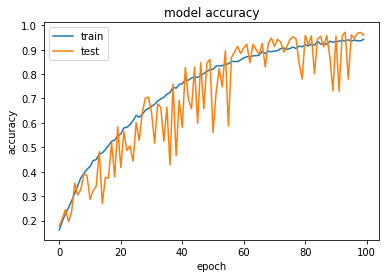

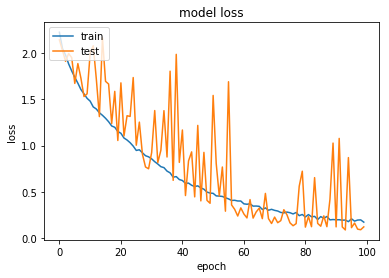

In [4]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras import backend as K
from numpy import genfromtxt

Y_train = np_utils.to_categorical(Y_train, num_classes=8)


batch_size = 64
num_classes = 8
epochs = 100
img_rows, img_cols = 30, 30

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(8))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

# model.fit(X_train, Y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(X_train, Y_train))

import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_train, Y_train))
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [5]:
X_test = genfromtxt("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/X_testing.csv",delimiter=',')
Y_test = genfromtxt("/Users/jack_wu/Documents/Machine learing/Lecture/ML/final/Y_testing.csv",delimiter=',')
Y_test = np_utils.to_categorical(Y_test, num_classes=8)

if K.image_data_format() == 'channels_first':
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.117167110587
Test accuracy: 0.961933134724


In [7]:
img = cv2.imread('/Users/jack_wu/IMG_2685.JPG')
output_address = "/Users/jack_wu/"
faces = face_cascade.detectMultiScale(img, 1.3, 5)
s_jpg='.jpg'

if (len(faces)!=0):
	for (x,y,w,h) in faces:
		gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
		roi_gray = gray[y:y+h, x:x+w]
		resize_face=cv2.resize(roi_gray,(30,30),interpolation=cv2.INTER_AREA)
		cv2.imwrite(output_address+'test'+s_jpg, resize_face, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

img = cv2.imread('/Users/jack_wu/test.JPG',0)
img = np.array(img)
img_rows = img.shape[0]
img_cols = img.shape[1]
test_img = np.zeros((1, img_rows, img_cols))
test_img [0,:,:] = img[:,:]

if K.image_data_format() == 'channels_first':
    test_img = test_img.reshape(test_img.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    test_img = test_img.reshape(test_img.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

ans_img = np.array(7)
ans_img = np_utils.to_categorical(ans_img, num_classes=8)

score = model.evaluate(test_img, ans_img, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0713510066271
Test accuracy: 1.0
